# Applied Statistical Learning in Python

## Exercise: Leukemia Diagnosis

You are given a dataset on 72 tissue samples taken from leukemia patients. The first 107 columns are gene expression measurements for genes known to be relevant to leukemia based on current knowledge. The last column is a label with 0 indicating that the patient had Acute Lymphoblastic Leukemia (ALL), while 1 indicating Acute Myeloid Leukemia (AML). Your task is to build a classification model to predict whether patients have ALL or AML based on their genetic expression values. Your model will be used as a diagnostic tool for new patients with leukemia.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Q1. Read in the dataset `leukemia.csv`. Print the first 5 rows. Check its dimensions.

In [2]:
# Write your code here
leukemia = pd.read_csv('leukemia.csv')

In [3]:
leukemia.head(5)

,M84371_rna1_s_at,J03779_at,X82240_rna1_at,U22376_cds2_s_at,U79262_at,M27396_s_at,J04948_at,M19508_xpt3_s_at,M22324_at,M23197_at,...,D88270_at,X15414_at,X63527_at,X67951_at,L13278_at,L14848_s_at,U46006_s_at,U49957_s_at,X01677_f_at,label
0,1477,6109,2302,2037,936,-7,736,1182,729,168,...,2006,1076,20415,4907,67,144,214,-24,12869,0
1,2758,3545,-111,1497,636,40,323,493,-203,244,...,1803,992,25795,3255,216,424,325,19,17954,0
2,721,3047,116,2105,681,135,616,1002,42,154,...,3110,1443,22761,2871,100,-12,48,1,17102,0
3,779,2126,212,2805,672,56,416,811,424,287,...,1924,512,14571,601,176,-27,33,-35,17048,0
4,2338,4498,18727,6996,1087,93,363,777,289,222,...,10157,3395,21771,7201,461,210,755,-39,12692,0


In [4]:
leukemia.shape

(72, 108)

In [5]:
X = leukemia.drop('label',axis=1)
y = leukemia['label']

## Q2. Split the data into training (67%) and testing (33%) sets. Check their dimensions.

In [6]:
# Write your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (48, 107)
y_train shape: (48,)
X_test shape: (24, 107)
y_test shape: (24,)


## Q3. Train 3 separate models using logistic regression, random forest and support vector machines. Compare their overall test accuracies, as well as test accuracies for predicting ALL and AML.

In [8]:
# function for scoring the overall and by-class test accuracy of a given model
score = lambda model, x_test, y_test: pd.Series([model.score(x_test, y_test), 
                                                 model.score(x_test[y_test==0], y_test[y_test==0]),
                                                 model.score(x_test[y_test==1], y_test[y_test==1])],
                                                index=['Overall test accuracy', 'Test accuracy on ALL', 'Test accuracy on AML'])

def score_and_params(model, X_test, y_test):
    return pd.Series([
        model.score(X_test, y_test), 
        model.score(X_test[y_test==0], y_test[y_test==0]),
        model.score(X_test[y_test==1], y_test[y_test==1]),
        model.best_params_
        ],
        index=['Overall test accuracy', 'Test accuracy on ALL', 'Test accuracy on AML', 'best_params_'])
    

In [9]:
# Write your code here
lr = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
svm.fit(X_train,y_train)

lr_score = score(lr, X_test, y_test)
rf_score = score(rf, X_test, y_test)
svm_score = score(svm, X_test, y_test)

print('LR:\n', f'\t{lr_score.index[0]}: {lr_score[0]}\n\t{lr_score.index[1]}: {lr_score[1]}\n\t{lr_score.index[2]}: {lr_score[2]}')
print()
print('RF:\n', f'\t{rf_score.index[0]}: {rf_score[0]}\n\t{rf_score.index[1]}: {rf_score[1]}\n\t{rf_score.index[2]}: {rf_score[2]}')
print()
print('SVM:\n', f'\t{svm_score.index[0]}: {svm_score[0]}\n\t{svm_score.index[1]}: {svm_score[1]}\n\t{svm_score.index[2]}: {svm_score[2]}')

score_df = pd.DataFrame(columns=lr_score.index)

score_df.loc['lr_score'] = lr_score
score_df.loc['rf_score'] = rf_score
score_df.loc['svm_score'] = svm_score

score_df

LR:
 	Overall test accuracy: 0.75
	Test accuracy on ALL: 0.6842105263157895
	Test accuracy on AML: 1.0

RF:
 	Overall test accuracy: 0.9166666666666666
	Test accuracy on ALL: 0.8947368421052632
	Test accuracy on AML: 1.0

SVM:
 	Overall test accuracy: 0.875
	Test accuracy on ALL: 0.8947368421052632
	Test accuracy on AML: 0.8


,Overall test accuracy,Test accuracy on ALL,Test accuracy on AML
lr_score,0.750000,0.684211,1.0
rf_score,0.916667,0.894737,1.0
svm_score,0.875000,0.894737,0.8


## Q4. Use 3-fold cross-validation to find the best number and maximum depth of trees for the random forest model. Use 3-fold cross-validation to find the best kernel and regularization parameter `C` for the SVM model.

In [10]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [11]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
# Write your code here
# 'class_weight': ['balanced', 'balanced_subsample', 'None']
rf_cv = GridSearchCV(estimator=rf,param_grid={'max_depth': range(1,6),'n_estimators': range(1,100)},cv=3)
rf_cv.fit(X_train,y_train)

svm_cv = GridSearchCV(estimator=svm,param_grid={'C': range(1,15)},cv=3)
svm_cv.fit(X_train,y_train)

rf_cv_score = score_and_params(rf_cv,X_test,y_test)
svm_cv_score = score_and_params(svm_cv,X_test,y_test)

cv_score_df = pd.DataFrame(columns=rf_cv_score.index)

cv_score_df.loc['rf_cv'] = rf_cv_score
cv_score_df.loc['svm_cv'] = svm_cv_score

cv_score_df

,Overall test accuracy,Test accuracy on ALL,Test accuracy on AML,best_params_
rf_cv,0.916667,0.894737,1.0,"{'max_depth': 1, 'n_estimators': 21}"
svm_cv,0.916667,0.894737,1.0,{'C': 9}


## Q5. Plot Receiver Operating Characteristic (ROC) curves for the 3 models in a graph and compare their areas under the curve (AUC). Use parameters tuned from above.

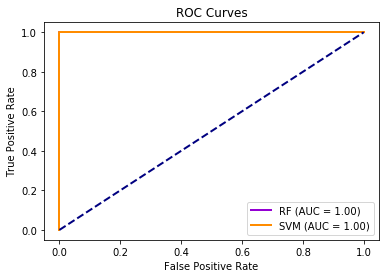

In [17]:
# Write your code here

fpr = dict()
tpr = dict()
roc_auc = dict()

# random forest
rf = RandomForestClassifier(class_weight='balanced', n_estimators=36, max_depth=2)
rf_probas = rf.fit(X_train, y_train).predict_proba(X_test)
fpr["RF"], tpr["RF"], _ = roc_curve(y_test, rf_probas[:, 1])
roc_auc["RF"] = auc(fpr["RF"], tpr["RF"])

# svm
svm = SVC(class_weight='balanced', kernel='linear', C=9)
svm_probas = svm.fit(X_train, y_train).decision_function(X_test)
fpr["SVM"], tpr["SVM"], _ = roc_curve(y_test, svm_probas)
roc_auc["SVM"] = auc(fpr["SVM"], tpr["SVM"])

# plot
plt.figure()
plt.plot(fpr["RF"], tpr["RF"], color='darkviolet', lw=2, label='RF (AUC = %0.2f)' % roc_auc["RF"])
plt.plot(fpr["SVM"], tpr["SVM"], color='darkorange', lw=2, label='SVM (AUC = %0.2f)' % roc_auc["SVM"])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

## Q6. Choose which model you would use for the diagnostic tool and explain your choice.

<i>Write your answer here.</i>

## Q7. Visualize the top 10 most predictive genes and their relative importance in the random forest model.

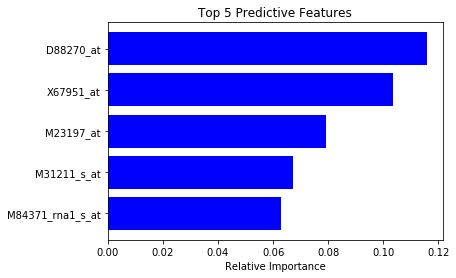

In [14]:
# Write your code here

# obtain feature importance list and sort
importances = rf.feature_importances_
indices = np.argsort(importances)
top5_indices = indices[-5:]

# extract gene names
features = leukemia.columns

# plot
plt.title('Top 5 Predictive Features')
plt.barh(range(len(top5_indices)), importances[top5_indices], color='blue', align='center')
plt.yticks(range(len(top5_indices)), features[top5_indices])
plt.xlabel('Relative Importance')
plt.show()